<a href="https://colab.research.google.com/github/haddjyb2k/-APPLIED-DATA-SECIENCE-CAPSTONE/blob/main/Text_Analysis_with_Spacy_to_Master_NLP_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Text Analysis with Spacy to Master NLP techniques

In [1]:
!pip install -U pip setuptools wheel
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import spacy

In [3]:
import en_core_web_sm

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
doc = nlp(u'Microsoft is trying to buy France based startup at $7 Million')
for token in doc:
  print(token.text)

Microsoft
is
trying
to
buy
France
based
startup
at
$
7
Million


In [6]:
for token in doc:
  print(token, token.pos_)

Microsoft PROPN
is AUX
trying VERB
to PART
buy VERB
France PROPN
based VERB
startup NOUN
at ADP
$ SYM
7 NUM
Million NUM


#### Tokenization

### Chunking

In [7]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
doc4 = nlp(u'tesla is a automobile based endorsed with high tech work for implimenting the electric cars')
for chunks in doc4.noun_chunks:
  print(chunks)

tesla
a automobile
high tech work
the electric cars


### How to visualize Tokenized data

Visualize synthetic dependency between tokens in documents.

In [9]:
from spacy import displacy
doc = nlp(u'Tesla to build solar electric startup in gujrat for $70 million')
displacy.render(doc, style='dep', jupyter=True, options = {'distance':100})

### Phrase Matching

In [10]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
#solarpower
pattern1 = [{'LOWER':'solarpower'}]
#solar power
pattern2 = [{'LOWER':'solar'},{'LOWER':'power'}]
#solar-power
pattern3 = [{'LOWER':'solar'},{"IS_PUNCT": True},{'LOWER':'power'}]
matcher.add('SolarPower',[pattern1,pattern2,pattern3])
#matcher.add('SolarPower',None,pattern1,pattern2,pattern3)
doc = nlp(u'The Solar Power industry continues to grow as demand for solarpower increases. solar-power operated products are popularity')
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


### Import spacy vocabulary Matcher object and create three different patterns to match the document. when printed, the output will get id of pattern, start and end position of matched phrase. Now,lets  see how  by printing each pattern with its id which it has matched.

In [11]:
for match_id, start, end in found_matches:
  string_id = nlp.vocab.strings[match_id]
  span = doc[start:end]
  print(match_id, string_id, start, end, span.text) 

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 solar-power


## Part of Speech(POS) Tagging

In English Grammar, part of speech tells us what is the function of a word and how it is used in a sentence. some of the common parts of speech are Noun, Pronoun, verb, adjective, adverb, etc.

POS tagging is a method of automatically assigning POS tags to all the words of a document. POS tagging is of 2 types. one is a course in which normal words come like nouns, verbs, and adjectives. Second is a fine-grained text which includes words that provide some special information like plural noun, past or present tense, superlative adjective, etc.

Now let us practice POS tagging practically, we will define the document and assign its part of speech and tags as well we will print a description of each tag it assigns.

In [12]:
doc = nlp(u'The quick brown fox, snatch the piece of cube from mouth of black crow')
for token in doc:
  print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

The        DET        DT         determiner
quick      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
brown      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
fox        NOUN       NN         noun, singular or mass
,          PUNCT      ,          punctuation mark, comma
snatch     VERB       VB         verb, base form
the        DET        DT         determiner
piece      NOUN       NN         noun, singular or mass
of         ADP        IN         conjunction, subordinating or preposition
cube       NOUN       NN         noun, singular or mass
from       ADP        IN         conjunction, subordinating or preposition
mouth      NOUN       NN         noun, singular or mass
of         ADP        IN         conjunction, subordinating or preposition
black      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
crow       NOUN       NN         noun, singular or mass


See how smartly Spacy has to assign correct POS tags to each token and its description can be read as well. It is also possible  to count how many words of each POS tag occur in our document and it will display each POS code and its count. And from vocabulary, we can check the exact POS

In [13]:
pos_counts = doc.count_by(spacy.attrs.POS)
print(pos_counts)
print(doc.vocab[92].text) #check which POS

{90: 2, 84: 3, 92: 5, 97: 1, 100: 1, 85: 3}
NOUN


### Visualizing Part of Speech 

In [14]:
options = {'distance':110,'compact':'True','color':'#F20835','bg':'#ADD8E6','font':'arial'}
displacy.render(doc, style='dep', jupyter=True, options=options)


### Named Entity Recognition(NER)

Entities are the words or groups which represent some special information about common things such as country, state, organization, person, etc. Spacy is a well-known library to perform entity recognition. It can identify entities and explain them saying what it means. so let’s try this out.

1.   List item
2.   List item



In [15]:
doc3 = nlp(u"Ambani good to go at Gujrat to start a agro based industry in jio Mart for $70 million")
for entity in doc3.ents:
  print(entity)
  print(entity.label_)
  print(str(spacy.explain(entity.label_)))
  print("n")

Ambani
ORG
Companies, agencies, institutions, etc.
n
Gujrat
ORG
Companies, agencies, institutions, etc.
n
jio Mart
ORG
Companies, agencies, institutions, etc.
n
$70 million
MONEY
Monetary values, including unit
n


### Visualizing NER

In [16]:
doc1 = nlp(u'over the last quarter Amazon has raised its profit from 20 thousand dilivery for a profit of $7 Million.'
u'By contract JBL only sold out 10 thousand Walkman Product Bluetooth speakers.')

In [17]:
#options = {'distance':110,'compact':'True','color':'#F20835','bg':'#ADD8E6','font':'arial'}
displacy.render(doc1, style='ent', jupyter=True, options=options)

In [18]:
doc1 = nlp(u'A Superintendent of Police, Goddy Ihende, has told a Lagos State High Court sitting at the Tafawa Balewa Square that a driver of the Lagos Bus Rapid Transit, Andrew Ominikoron, who allegedly raped and murdered his passenger, Oluwabamise Ayanwole, always raped his victims in secluded places.'

u'The witness said apart from the deceased, the defendant attempted to rape one Doctor Victoria Anieke.'u'He said the incident happened on December 29, 2021, when Anieke, who resided in Delta State, came to visit her parents and friend, who resided in the Ketu and Ikorodu areas of Lagos, respectively.' 

u'Ihende, who is the seventh prosecution witness, told Justice Sherifat Sonaike that the modus operandi of the defendant was to carry his victims alone and go to secluded places to rape them.'
u'At the resumed hearing of the trial on Tuesday, the witness, who was led in evidence by the Director of Public Prosecutions, Dr Babajide Martins, said he took over the defendant’s case on March 7, 2022, from the Department of State Services.')
displacy.render(doc1, style='ent', jupyter=True, options=options)

In [19]:
displacy.render(doc1, style='dep', jupyter=True, options=options)

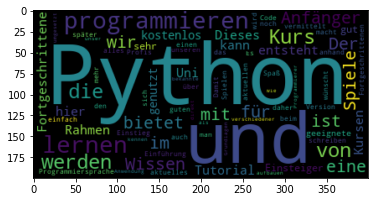

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = 'Python Kurs: mit Python programmieren lernen für Anfänger und Fortgeschrittene Dieses Python Tutorial entsteht im Rahmen von Uni-Kursen und kann hier kostenlos genutzt werden. Python ist eine für Anfänger und Einsteiger sehr gut geeignete Programmiersprache, die später auch den Fortgeschrittenen und Profis alles bietet, was man sich beim Programmieren wünscht. Der Kurs ist eine Einführung und bietet einen guten Einstieg. Es wird aktuelles Wissen vermittelt - daher schreiben wir unseren Python-Code mit der aktuellen Python-Version 3. einfach Python lernen über das Programmieren von Spielen Damit Python programmieren lernen noch mehr Spaß macht, werden wir im Kurs anhand verschiedener Spiele die Anwendung von Python kennen lernen und unser Wissen als Programmierer aufbauen. Die Grundlagen werden direkt umgesetzt in bekannte Spiele wie:'

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [23]:
text1 = 'A Superintendent of Police, Goddy Ihende has told a Lagos State High Court sitting at the Tafawa Balewa Square that a driver of the Lagos Bus Rapid Transit Andrew Ominikoron, who allegedly raped and murdered his passenger Oluwabamise Ayanwole always raped his victims in secluded places.' 

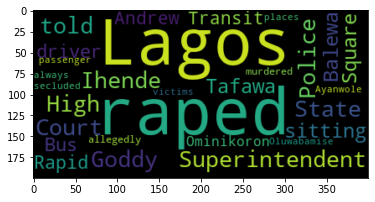

In [24]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [25]:
text2 = 'https://punchng.com/bamise-how-lagos-brt-driver-raped-female-passengers-says-witness/'

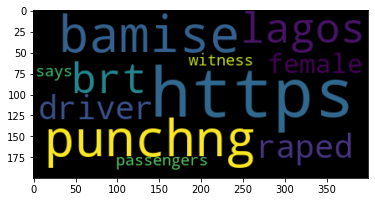

In [26]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [27]:
url = 'https://punchng.com/breaking-return-kanu-to-kenya-court-orders-fg/'

In [28]:
import requests
requests.get(url)

<Response [200]>

In [29]:
# install wordcloud
! pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('WordCloud is installed and imported!')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
WordCloud is installed and imported!


In [30]:
#we are using request package to make a GET request for the website, which means we're getting data from it.
r=requests.get('https://punchng.com/bamise-how-lagos-brt-driver-raped-female-passengers-says-witness/')

In [31]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [32]:
#Extracting the HTML from the request object
html = r.text

In [33]:
# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html>
<html lang="en-US">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">

    <link rel="profile" href="https://gmpg.org/xfn/11">
	<link rel="pingback" href="https://punchng.com/xmlrpc.php">

    <link rel="preconnect" href="https://cdn.punchng.com">
	<link rel="preconnect" href="https://tpc.googlesyndication.com">
	<link rel="preconnect" href="https://securepubads.g.doubleclick.net">
	<link rel="preconnect" href="https://pag


In [34]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os

In [35]:
! pip install TextBlob
from textblob import TextBlob
! pip install sentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
! python -m spacy download en_core_web_sm
! pip install spacy
import spacy

2022-10-26 14:20:37.286012: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()

In [38]:
#total length
len(text)

209622

In [39]:
#having a look at the text
print(text[1:1100])


















        @charset "UTF-8";body{font-family:Open Sans,sans-serif}.primisVideoUnit .main-title{font-size:18px!important;margin-bottom:1em;font-weight:800!important}a{text-decoration:none}a,a:active,a:hover{color:inherit}.testing{width:100px}.navigation-wrapper{position:relative}.header-top{padding:1em;display:flex;justify-content:center;align-items:center}.header-top .container{display:flex;align-items:center;justify-content:space-between}.header-top .offcanvas-button{display:none;float:right}.header-top .offcanvas-button a{color:red;font-size:35px}.header-top .header-top-right{display:flex;flex-direction:row}.header-top .header-top-right .subscribe-btn{color:#fff;background:#000;height:35px;border-radius:36px;width:150px;display:flex;justify-content:center;align-items:center;font-family:Open Sans;font-style:normal;font-weight:600;font-size:14px;line-height:18px;border:1px solid #000}.header-top .header-top-right .subscribe-btn svg{margin-right:.55em}.header-top .header-t

### Let now proceed with text cleaning

In [40]:
clean_text= text.replace(" n", " ")
clean_text= clean_text.replace(" /", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [41]:
clean_text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        @charset "UTF-8";body{font-family:Open Sans,sans-serif}.primisVideoUnit .main-title{font-size:18px!important;margin-bottom:1em;font-weight:800!important}a{text-decoration:none}a,a:active,a:hover{color:inherit}.testing{width:100px}.navigation-wrapper{position:relative}.header-top{padding:1em;display:flex;justify-content:center;align-items:center}.header-top .container{display:flex;align-items:center;justify-content:space-between}.header-top .offcanvas-button{display:none;float:right}.header-top .offcanvas-button a{color:red;font-size:35px}.header-top .header-top-right{display:flex;flex-direction:row}.header-top .header-top-right .subscribe-btn{color:#fff;background:#000;height:35px;border-radius:36px;width:150px;display:flex;justify-content:center;align-items:center;font-family:Open Sans;font-style:normal;font-weight:600;font-size:14px;line-height:18px;border:1px solid #000}.header-top .header-top-right .subscribe-btn svg{margin-right:.55em}.